In [88]:
%matplotlib inline
# %matplotlib

In [2]:
from __future__ import division,print_function

In [3]:
from spartan.utils import sklearn as splearn

In [592]:
import numpy as np
import pandas as pd
import sklearn as skl
import sklearn.preprocessing as ppro

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA, RandomizedPCA, KernelPCA, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RandomizedLogisticRegression
from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectKBest

from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import SelectFromModel

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

In [86]:
sns.set_context('poster')

In [7]:
tax_path = "/home/gus/MEGAsync/zim/main/BCH/Projects/Amy/2016-01-07_~_16s_data/otu_table_mc2_w_tax_no_pynast_failures.biom.TAXON.tsv"
map_path = "/home/gus/MEGAsync/zim/main/BCH/Projects/Amy/2016-01-07_~_16s_data/BL6SPFDec16map.txt"

In [8]:
tax = pd.read_csv(filepath_or_buffer=tax_path, sep='\t', 
                  quoting=0, skipinitialspace=False, lineterminator=None, header='infer', index_col=None, names=None)

meta = pd.read_csv(filepath_or_buffer=map_path, sep='\t')

In [9]:
tax.head()

,OTU ID,23,25,27,28,30,39,41,8,24,7,9,5
0,206494,33,16,190,11,92,12,2272,2,0,0,0,0
1,276629,0,0,1,0,0,0,0,0,1,1,0,0
2,276620,0,0,0,0,0,0,0,0,2,1,1,0
3,330294,0,0,0,0,0,0,2,0,0,0,2,0
4,184456,1,0,0,0,0,0,1,0,0,0,0,0


In [10]:
tax.index = tax['OTU ID'].values
tax = tax.drop(['OTU ID'],axis=1)

In [11]:
tax.head()

,23,25,27,28,30,39,41,8,24,7,9,5
206494,33,16,190,11,92,12,2272,2,0,0,0,0
276629,0,0,1,0,0,0,0,0,1,1,0,0
276620,0,0,0,0,0,0,0,0,2,1,1,0
330294,0,0,0,0,0,0,2,0,0,0,2,0
184456,1,0,0,0,0,0,1,0,0,0,0,0


In [12]:
tax_scaled = tax.T.apply(lambda m: (m - m.mean())/m.std()).T
# tax_scaled = tax.T.apply(lambda m: (m / m.sum())).T
# tax_scaled = tax

In [13]:
tax_scaled.head()

,23,25,27,28,30,39,41,8,24,7,9,5
206494,-0.286613,-0.312809,-0.044687,-0.320513,-0.195698,-0.318972,3.163527,-0.334382,-0.337463,-0.337463,-0.337463,-0.337463
276629,-0.552771,-0.552771,1.658312,-0.552771,-0.552771,-0.552771,-0.552771,-0.552771,1.658312,1.658312,-0.552771,-0.552771
276620,-0.511766,-0.511766,-0.511766,-0.511766,-0.511766,-0.511766,-0.511766,-0.511766,2.558832,1.023533,1.023533,-0.511766
330294,-0.428174,-0.428174,-0.428174,-0.428174,-0.428174,-0.428174,2.140872,-0.428174,-0.428174,-0.428174,2.140872,-0.428174
184456,2.140872,-0.428174,-0.428174,-0.428174,-0.428174,-0.428174,2.140872,-0.428174,-0.428174,-0.428174,-0.428174,-0.428174


In [14]:
s = tax.sum()

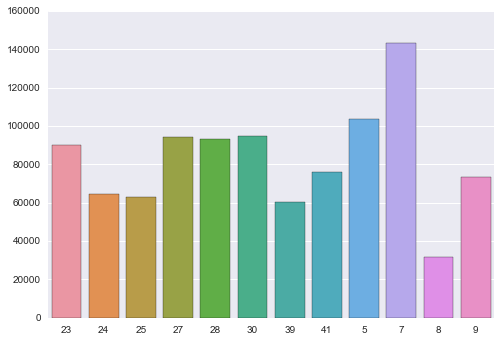

In [15]:
sns.barplot(x=s.index.values,y=s);

In [16]:
meta.SampleID = meta.SampleID.astype(str)

# Join meta data

In [97]:
# meta.set_index('SampleID')

In [98]:
meta['WT or not'] = meta.Genotype1.apply(lambda i: i if i == 'WT' else 'mutant')
meta.head()

,SampleID,Mouse ID,Gender,DOB,Ear Tag,Genotype1,Genotype,Cage,Notes,WT or not
0,23,I175,F,7/6/15,R,WT,WT (08/25/15) cre+ (08/26/15),943947,Parent cage 892230,WT
1,24,I176,F,7/5/15,L,WT,WT,943947,Parent cage 892234,WT
2,25,I177,F,7/4/15,-,TregWKO,WASp fl/fl (08/25/15) cre+ (09/08/15),943947,Parent cage 892221,mutant
3,41,I208,F,7/1/15,RL,WT,WT,943947,Parent cage 892226,WT
4,27,I179,F,7/7/15,2L,WKO,WKO (8/20/15),943947,Parent cage 892227,mutant


In [99]:
full_table = meta.set_index('SampleID').join(tax_scaled.T).reset_index()

In [100]:
full_table.head()

,SampleID,Mouse ID,Gender,DOB,Ear Tag,Genotype1,Genotype,Cage,Notes,WT or not,...,New.CleanUp.ReferenceOTU56003,New.CleanUp.ReferenceOTU56005,New.CleanUp.ReferenceOTU56008,New.CleanUp.ReferenceOTU56017,New.CleanUp.ReferenceOTU56020,New.CleanUp.ReferenceOTU56032,New.CleanUp.ReferenceOTU56042,New.CleanUp.ReferenceOTU56061,New.CleanUp.ReferenceOTU56065,New.CleanUp.ReferenceOTU56069
0,23,I175,F,7/6/15,R,WT,WT (08/25/15) cre+ (08/26/15),943947,Parent cage 892230,WT,...,2.140872,-0.552771,2.140872,2.140872,-0.552771,-0.428174,-0.428174,-0.428174,-0.428174,-0.4022
1,24,I176,F,7/5/15,L,WT,WT,943947,Parent cage 892234,WT,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,-0.428174,-0.428174,-0.428174,-0.428174,-0.4022
2,25,I177,F,7/4/15,-,TregWKO,WASp fl/fl (08/25/15) cre+ (09/08/15),943947,Parent cage 892221,mutant,...,-0.428174,1.658312,-0.428174,-0.428174,1.658312,-0.428174,-0.428174,2.140872,-0.428174,-0.4022
3,41,I208,F,7/1/15,RL,WT,WT,943947,Parent cage 892226,WT,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,-0.428174,-0.428174,-0.428174,-0.428174,-0.4022
4,27,I179,F,7/7/15,2L,WKO,WKO (8/20/15),943947,Parent cage 892227,mutant,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,-0.428174,2.140872,2.140872,2.140872,-0.4022


# Set up test/train split

## Encode 'y' labels

In [120]:
y_geno = full_table['WT or not']

In [121]:
geno_encoder = ppro.LabelEncoder()

In [122]:
y_geno_encoded = geno_encoder.fit_transform(y_geno)

## Encode 'X' data

In [124]:
X_cols_cat = list(full_table.columns[[2,7]].values)
X_cols_num = list(full_table.columns[10:])

In [1]:
X_cols_num[:10]

NameError: name 'X_cols_num' is not defined

In [126]:
# make the dummy variable columns for the original categorical data columns
# HOPEFULLY we dont run into colinearity issues
X_data_cat = pd.get_dummies(full_table[X_cols_cat].astype(str))

In [127]:
X_data_cat

,Gender_F,Gender_M,Cage_943947,Cage_943948,Cage_943951
0,1,0,1,0,0
1,1,0,1,0,0
2,1,0,1,0,0
3,1,0,1,0,0
4,1,0,1,0,0
5,0,1,0,1,0
6,0,1,0,1,0
7,0,1,0,1,0
8,0,1,0,1,0
9,1,0,0,0,1


In [220]:
X_data_cat = X_data_cat[['Gender_F', 'Cage_943947', 'Cage_943948']]
X_data_cat

,Gender_F,Cage_943947,Cage_943948
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [325]:
# put all data columns together
X = pd.concat([X_data_cat,full_table[X_cols_num]],axis=1) # Accounting for Cages and Sex
# X = full_table[X_cols_num] # IGNORING Cages and Sex

In [326]:
X.head()

,Gender_F,Cage_943947,Cage_943948,206494,276629,276620,330294,184456,273164,182583,...,New.CleanUp.ReferenceOTU56003,New.CleanUp.ReferenceOTU56005,New.CleanUp.ReferenceOTU56008,New.CleanUp.ReferenceOTU56017,New.CleanUp.ReferenceOTU56020,New.CleanUp.ReferenceOTU56032,New.CleanUp.ReferenceOTU56042,New.CleanUp.ReferenceOTU56061,New.CleanUp.ReferenceOTU56065,New.CleanUp.ReferenceOTU56069
0,1,1,0,-0.286613,-0.552771,-0.511766,-0.428174,2.140872,1.206599,-0.428174,...,2.140872,-0.552771,2.140872,2.140872,-0.552771,-0.428174,-0.428174,-0.428174,-0.428174,-0.4022
1,1,1,0,-0.337463,1.658312,2.558832,-0.428174,-0.428174,-0.402200,-0.428174,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,-0.428174,-0.428174,-0.428174,-0.428174,-0.4022
2,1,1,0,-0.312809,-0.552771,-0.511766,-0.428174,-0.428174,-0.402200,-0.428174,...,-0.428174,1.658312,-0.428174,-0.428174,1.658312,-0.428174,-0.428174,2.140872,-0.428174,-0.4022
3,1,1,0,3.163527,-0.552771,-0.511766,2.140872,2.140872,-0.402200,-0.428174,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,-0.428174,-0.428174,-0.428174,-0.428174,-0.4022
4,1,1,0,-0.044687,1.658312,-0.511766,-0.428174,-0.428174,2.815399,-0.428174,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,-0.428174,2.140872,2.140872,2.140872,-0.4022


In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y_geno_encoded,
                                                    test_size=0.33, random_state=42,
                                                   )



In [337]:
X_train

,Gender_F,Cage_943947,Cage_943948,206494,276629,276620,330294,184456,273164,182583,...,New.CleanUp.ReferenceOTU56003,New.CleanUp.ReferenceOTU56005,New.CleanUp.ReferenceOTU56008,New.CleanUp.ReferenceOTU56017,New.CleanUp.ReferenceOTU56020,New.CleanUp.ReferenceOTU56032,New.CleanUp.ReferenceOTU56042,New.CleanUp.ReferenceOTU56061,New.CleanUp.ReferenceOTU56065,New.CleanUp.ReferenceOTU56069
5,0,0,1,-0.337463,-0.552771,-0.511766,-0.428174,-0.428174,-0.402200,2.140872,...,-0.428174,1.658312,-0.428174,-0.428174,1.658312,2.140872,-0.428174,-0.428174,-0.428174,2.815399
2,1,1,0,-0.312809,-0.552771,-0.511766,-0.428174,-0.428174,-0.402200,-0.428174,...,-0.428174,1.658312,-0.428174,-0.428174,1.658312,-0.428174,-0.428174,2.140872,-0.428174,-0.402200
1,1,1,0,-0.337463,1.658312,2.558832,-0.428174,-0.428174,-0.402200,-0.428174,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,-0.428174,-0.428174,-0.428174,-0.428174,-0.402200
11,1,0,0,-0.195698,-0.552771,-0.511766,-0.428174,-0.428174,-0.402200,-0.428174,...,-0.428174,-0.552771,-0.428174,-0.428174,1.658312,-0.428174,2.140872,-0.428174,-0.428174,-0.402200
4,1,1,0,-0.044687,1.658312,-0.511766,-0.428174,-0.428174,2.815399,-0.428174,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,-0.428174,2.140872,2.140872,2.140872,-0.402200
7,0,0,1,-0.334382,-0.552771,-0.511766,-0.428174,-0.428174,-0.402200,-0.428174,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,-0.428174,-0.428174,-0.428174,-0.428174,-0.402200
3,1,1,0,3.163527,-0.552771,-0.511766,2.140872,2.140872,-0.402200,-0.428174,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,-0.428174,-0.428174,-0.428174,-0.428174,-0.402200
6,0,0,1,-0.337463,1.658312,1.023533,-0.428174,-0.428174,-0.402200,-0.428174,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,2.140872,-0.428174,-0.428174,-0.428174,-0.402200


In [328]:
y_train

array([1, 1, 0, 1, 1, 0, 0, 1])

# Set up pipelines

## SVM classifier

In [329]:
svc_param_grid = {'svc__C': 10. ** np.arange(-3, 3),
                  'svc__gamma': 10. ** np.arange(-3, 3)
                 }



svc_pipe = make_pipeline(
                         SVC(kernel='linear', random_state=42))

In [330]:
svc_grid = GridSearchCV(svc_pipe, param_grid=svc_param_grid, cv=3)

In [331]:
svc_grid.fit(X_train, y_train)
# svc_grid.fit(X, y_geno_encoded)
print(svc_grid.best_params_)

{'svc__gamma': 0.001, 'svc__C': 0.001}


In [332]:
svc_grid.predict(X)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [333]:
y_geno_encoded

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1])

In [334]:
svc_cm = confusion_matrix(y_geno_encoded,svc_grid.predict(X))

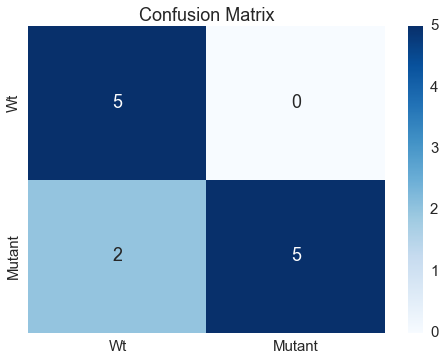

In [335]:
splearn.plot_confusion_matrix(cm=svc_cm, labels=geno_encoder.classes_, cmap='Blues', title=None,
                 norm=False, context=None, annot=True);

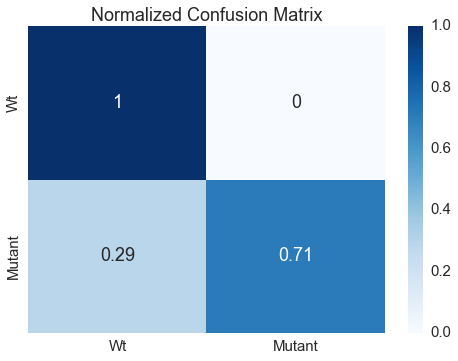

In [336]:
splearn.plot_confusion_matrix(cm=svc_cm, labels=geno_encoder.classes_, cmap='Blues', title=None,
                 norm=True, context=None, annot=True);

## RandomizedLogisticRegression

In [233]:
rfst_param_grid = {'randomforestclassifier__n_estimators': np.arange(1,15,),
                   'randomforestclassifier__min_samples_leaf': np.arange(1,10,2)
                  }
rfst_pipe = make_pipeline(RandomForestClassifier(random_state=42,n_jobs=8))

## RandomForestClassifier

In [234]:
# scaler_minmax = ppro.MinMaxScaler()

# clf_rfst = RandomForestClassifier(n_estimators=30, criterion='gini', 
#                                 max_depth=None, min_samples_split=2, 
#                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                                 max_features='auto', max_leaf_nodes=None, 
#                                 bootstrap=True, oob_score=False, n_jobs=6,
#                                 random_state=None, verbose=0, warm_start=False, class_weight=None)


rfst_param_grid = {'extratreesclassifier__n_estimators': np.arange(10,200,20),
#                    'extratreesclassifier__min_samples_leaf': np.arange(1,10,2)
                  }
rfst_pipe = make_pipeline(ExtraTreesClassifier(random_state=42,n_jobs=8))

In [235]:
rfst_grid = GridSearchCV(rfst_pipe, param_grid=rfst_param_grid, cv=3)

In [236]:
rfst_grid.fit(X_train, y_train)
# rfst_grid.fit(X, y_geno_encoded)
print(rfst_grid.best_params_)

{'extratreesclassifier__n_estimators': 10}


In [237]:
rfst_cm = confusion_matrix(y_geno_encoded,rfst_grid.predict(X))

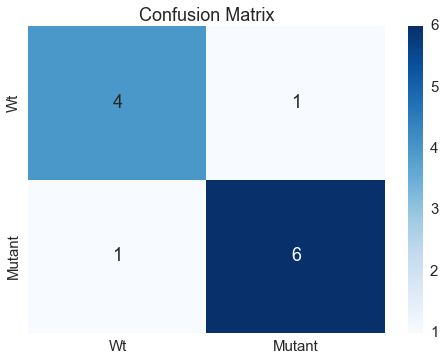

In [238]:
splearn.plot_confusion_matrix(cm=rfst_cm, labels=geno_encoder.classes_, cmap='Blues', title=None,
                 norm=False, context=None, annot=True);

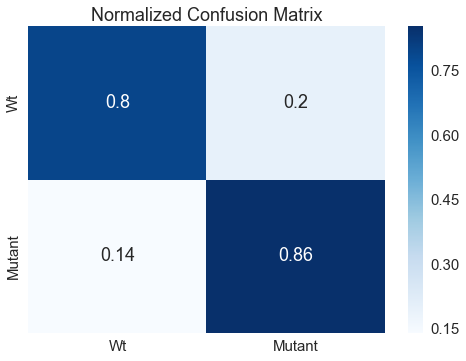

In [239]:
splearn.plot_confusion_matrix(cm=rfst_cm, labels=geno_encoder.classes_, cmap='Blues', title=None,
                 norm=True, context=None, annot=True);

In [240]:
# ExtraTreesClassifier

In [632]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=10000,
                              random_state=0,
                              n_jobs=8
                             )

forest.fit(X, y_geno_encoded)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]




Feature ranking:
1. feature 7537 (0.010519)
2. feature 316 (0.009195)
3. feature 6108 (0.005898)
4. feature 3507 (0.005457)
5. feature 8106 (0.005255)
6. feature 9223 (0.005181)
7. feature 8655 (0.005116)


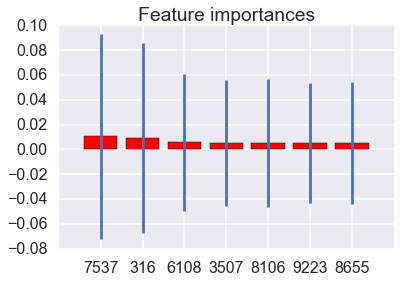

In [633]:
n_features = 7


# Print the feature ranking
print("Feature ranking:")

for f in range(n_features):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(n_features), importances[indices][:n_features],
       color="r", yerr=std[indices][:n_features], align="center")
plt.xticks(range(n_features), indices[:n_features])
# plt.xlim([-1, n_features])
plt.show()

In [634]:
X_tree_sorted = X.iloc[:,indices]

In [635]:
def repandasify(array, y_names, X_names=None):
    df = pd.DataFrame(data=array, index=y_names,columns=X_names)
    return df

# PCA

In [678]:
top_n_sorted_features = 7

# pca = PCA(n_components=2, whiten=False)
pca = RandomizedPCA(n_components=2, whiten=False)
# pca = KernelPCA(n_components=2,)
pca = FactorAnalysis(n_components=2, iterated_power=5)
pca_t = pca.fit_transform(X_tree_sorted.iloc[:,:top_n_sorted_features],y_geno_encoded)
# top_n_comp = 2
# print('explained_variance_ratio_ of top {num}: {val}'.format(num=top_n_comp,val=pca.explained_variance_ratio_[:top_n_comp].sum()))

pca_t_l = repandasify(array=pca_t, y_names=geno_encoder.inverse_transform(y_geno_encoded), X_names=['PC {v_}'.format(v_=v+1) for v in range(len(pca_t[0]))])
print(pca_t_l)

            PC 1      PC 2
WT      1.732051 -0.134829
WT     -0.577350 -0.246664
mutant -0.577350 -0.394768
WT      1.732051  0.021324
mutant -0.577350 -0.450692
mutant -0.577350 -0.394768
mutant -0.577350 -0.394768
WT      1.732051  0.113504
WT     -0.577350  3.177811
mutant -0.577350 -0.394768
mutant -0.577350 -0.450692
mutant -0.577350 -0.450692


In [679]:
pca_t_l = repandasify(array=pca_t, y_names=geno_encoder.inverse_transform(y_geno_encoded), X_names=['PC {v_}'.format(v_=v+1) for v in range(len(pca_t[0]))])

pca_t_l['geno'] = pca_t_l.index.values
pca_t_l = pca_t_l.reset_index(drop=True)
pca_t_l['Cage'] = full_table.Cage.astype(str)
pca_t_l['Sex'] = full_table.Gender
pca_t_l['Specific Genotype'] = full_table.Genotype1
# pca_t_l

In [680]:
plot_alpha = 0.7

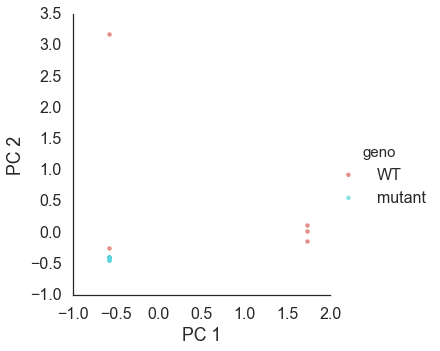

In [681]:
with sns.color_palette(sns.color_palette("hls", 2)):
    with sns.axes_style("white"):
        sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l.append(pca_t_l.iloc[9,:]), #sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l,
                   hue='geno', palette=None,
                   fit_reg=False,
                   scatter_kws={'alpha':plot_alpha}
                  );

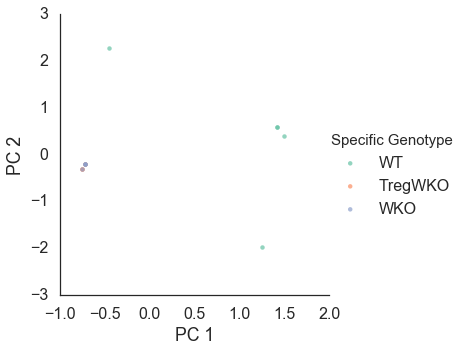

In [677]:
with sns.color_palette(sns.color_palette("Set2", 3)):
    with sns.axes_style("white"):
        sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l.append(pca_t_l.iloc[9,:]), #sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l,
                   hue='Specific Genotype', palette=None,
                   fit_reg=False,
                   scatter_kws={'alpha':plot_alpha}
                  );

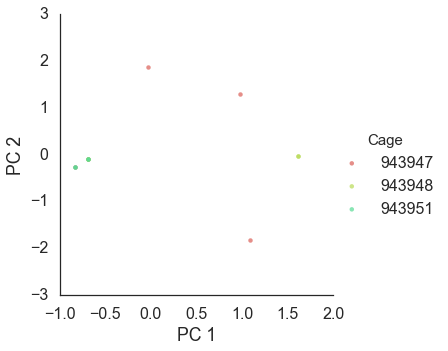

In [672]:
with sns.color_palette(sns.color_palette("hls", 5)):
    with sns.axes_style("white"):
        sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l.append(pca_t_l.iloc[9,:]), #sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l,
                   hue='Cage', palette=None,
                   fit_reg=False,
                   scatter_kws={'alpha':plot_alpha}
                  );

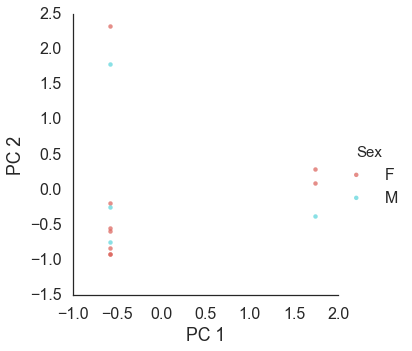

In [627]:
with sns.color_palette(sns.color_palette("hls", 2)):
    with sns.axes_style("white"):
        sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l.append(pca_t_l.iloc[9,:]), #sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l,
                   hue='Sex', palette=None,
                   fit_reg=False,
                   scatter_kws={'alpha':plot_alpha}
                  );

# LinearDiscriminantAnalysis

In [477]:
LinearDiscriminantAnalysis()

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [478]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda_t = lda.fit_transform(X,y_geno_encoded)
# print('explained_variance_ratio_: ',lda.explained_variance_ratio_)

lda_t_l = repandasify(array=lda_t, y_names=geno_encoder.inverse_transform(y_geno_encoded), X_names=['PC {v_}'.format(v_=v+1) for v in range(len(lda_t[0]))])

lda_t_l['geno'] = lda_t_l.index.values
lda_t_l['Cage'] = full_table.Cage.astype(str)
lda_t_l['Sex'] = full_table.Gender
lda_t_l['Specific Genotype'] = full_table.Genotype1

lda_t_l = lda_t_l.reset_index(drop=True)
lda_t_l

,PC 1,geno,Cage,Sex,Specific Genotype
0,-1.175815,WT,NaN,NaN,NaN
1,-0.356567,WT,NaN,NaN,NaN
2,-0.342533,mutant,NaN,NaN,NaN
3,-1.280321,WT,NaN,NaN,NaN
4,0.620619,mutant,NaN,NaN,NaN
5,0.859429,mutant,NaN,NaN,NaN
6,1.094525,mutant,NaN,NaN,NaN
7,1.764654,WT,NaN,NaN,NaN
8,-1.024927,WT,NaN,NaN,NaN
9,0.174184,mutant,NaN,NaN,NaN


In [289]:
with sns.axes_style("white"):
    sns.lmplot(x='PC 1', y='PC 1', data=lda_t_l, 
               hue='Cage', palette='bright',
               fit_reg=False);

KeyError: "['Cage'] not in index"